In [9]:
import random
import math
import matplotlib.pyplot as plt 

def LikelihoodWeighting(N, n, Z, alpha, query, sampleSizes):
    numerator = 0.0
    denominator = 0.0
    probs = []
    
    # Sampling starts here. N samples will be taken
    for i in range(0, N):
        fb = 0 # decimal value represented by B's
        bits = []
        
        for j in range(0, n):
            # Sample Bj and update fb
            prob = random.uniform(0, 1)
            if(prob >= 0.5):
                bits.append(1)
                fb = fb + math.pow(2, j)
            else:
                bits.append(0)

        # define the weighting term
        weight = ((1-alpha)/(1+alpha))*math.pow(alpha, abs(Z - fb))

        # Indicator function implementation. Checks if a particular bit is 1 or not
        if(bits[query-1] == 1):
            numerator = numerator + weight

        denominator = denominator + weight
        
        # Storing probabilities for some samples to plot probability vs sample size
        if(i+1 in sampleSizes):
            probs.append(numerator/denominator)

    return probs

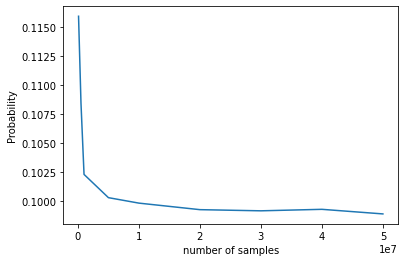

[0.1159658305792614, 0.10844669350255887, 0.10229441047951313, 0.10028502262140185, 0.09981262009869292, 0.09924791463417525, 0.09914801581996328, 0.0992768198945345, 0.09887992407125767]


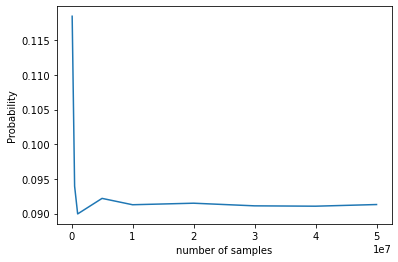

[0.11844430867475586, 0.093961285511094, 0.08995844334111514, 0.09219620193846959, 0.09128097661830788, 0.09150177340174519, 0.09112149682255084, 0.09107136887471863, 0.09131009583150379]


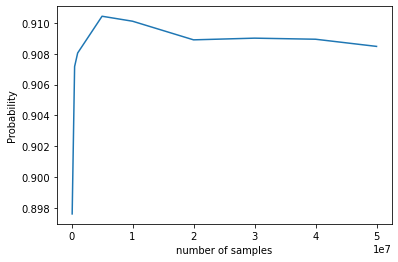

[0.8975963457053299, 0.9071661871242471, 0.9080476414341342, 0.9104356490479034, 0.9101124019819996, 0.9089025990420255, 0.9090122949071741, 0.9089424685067147, 0.9084771297708696]


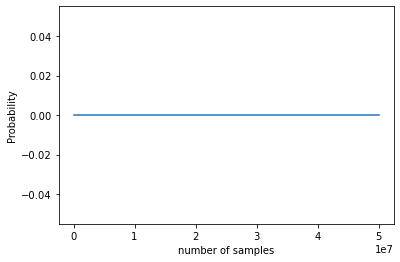

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [10]:
sampleSizes = [100000, 500000, 1000000, 5000000, 10000000, 20000000, 30000000, 40000000, 50000000]
Z = 128
n = 10
alpha = 0.1
queries = [2, 5, 8, 10]

for query in queries:
    probs = LikelihoodWeighting(sampleSizes[-1], n, Z, alpha, query, sampleSizes)
        
    plt.plot(sampleSizes, probs)
    plt.title('')
    plt.xlabel('number of samples')
    plt.ylabel('Probability')
    plt.savefig('B'+str(query)+'.png')
    plt.show()
    plt.close()
    print(probs)